# Condorcet Efficiency

In [1]:
from pref_voting.profiles import Profile
from pref_voting.voting_methods import *
from pref_voting.analysis import binomial_confidence_interval

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Suppose that $\mathbf{P}$ is a profile and $a$ and $b$ are candidates in $\mathbf{P}$. 

The **support** $a$ over $b$ in $\mathbf{P}$, denoted $Support_\mathbf{P}(a, b)$ is the number of voters who rank $a$ above $b$.

The **margin** $a$ over $b$ in $\mathbf{P}$, denoted $Margin_\mathbf{P}(a, b)$ is the number of voters who rank $a$ above $b$ minus the number of voters who rank $b$ above $a$.  That is, $$Margin_\mathbf{P}(a, b)= Support_\mathbf{P}(a, b) - Support_\mathbf{P}(b, a).$$

We say that $a$ is **majority preferred** to $b$ when $Margin_\mathbf{P}(a, b) > 0$.

We say that $a$ is the **Condorcet winner** when $a$ is majority preferred to every other candidate.  That is, for all candidates $b$ in $\mathbf{P}$, if $a\neq b$, then $Margin_\mathbf{P}(a, b) > 0$.

In [2]:
prof = Profile([
    [0, 1, 3, 2], 
    [3, 2, 0, 1], 
    [3, 1, 0, 2]])
prof.display()

for c1 in prof.candidates: 
    for c2 in prof.candidates:
        if c1 != c2:
            print(f"The margin of {c1} over {c2} is {prof.margin(c1, c2)}")
            print(f"\tThe number of voters that rank {c1} over {c2} is {prof.support(c1, c2)}")
            print(f"\tThe number of voters that rank {c2} over {c1} is {prof.support(c2, c1)}")
            if prof.majority_prefers(c1, c2):
                print(f"\t{c1} is majority preferred to {c2}")
print()

cw = prof.condorcet_winner()
if cw is not None: 
    print(f"The Condorcet winner is {cw}")
else: 
    print("There is no Condorcet winner")

+---+---+---+
| 1 | 1 | 1 |
+---+---+---+
| 0 | 3 | 3 |
| 1 | 2 | 1 |
| 3 | 0 | 0 |
| 2 | 1 | 2 |
+---+---+---+
The margin of 0 over 1 is 1
	The number of voters that rank 0 over 1 is 2
	The number of voters that rank 1 over 0 is 1
	0 is majority preferred to 1
The margin of 0 over 2 is 1
	The number of voters that rank 0 over 2 is 2
	The number of voters that rank 2 over 0 is 1
	0 is majority preferred to 2
The margin of 0 over 3 is -1
	The number of voters that rank 0 over 3 is 1
	The number of voters that rank 3 over 0 is 2
The margin of 1 over 0 is -1
	The number of voters that rank 1 over 0 is 1
	The number of voters that rank 0 over 1 is 2
The margin of 1 over 2 is 1
	The number of voters that rank 1 over 2 is 2
	The number of voters that rank 2 over 1 is 1
	1 is majority preferred to 2
The margin of 1 over 3 is -1
	The number of voters that rank 1 over 3 is 1
	The number of voters that rank 3 over 1 is 2
The margin of 2 over 0 is -1
	The number of voters that rank 2 over 0 is 1


However, not every election has a Condorcet winner.

In [3]:
prof = Profile([
    [0, 1, 2], 
    [1, 2, 0], 
    [2, 0, 1]], 
    rcounts=[2, 2, 1])
prof.display()
for c1 in prof.candidates: 
    for c2 in prof.candidates:
        if c1 != c2:
            print(f"The margin of {c1} over {c2} is {prof.margin(c1, c2)}")
            print(f"\tThe number of voters that rank {c1} over {c2} is {prof.support(c1, c2)}")
            print(f"\tThe number of voters that rank {c2} over {c1} is {prof.support(c2, c1)}")
            if prof.majority_prefers(c1, c2):
                print(f"\t{c1} is majority preferred to {c2}")
print()

cw = prof.condorcet_winner()
if cw is not None: 
    print(f"The Condorcet winner is {cw}")
else: 
    print("There is no Condorcet winner")

+---+---+---+
| 2 | 2 | 1 |
+---+---+---+
| 0 | 1 | 2 |
| 1 | 2 | 0 |
| 2 | 0 | 1 |
+---+---+---+
The margin of 0 over 1 is 1
	The number of voters that rank 0 over 1 is 3
	The number of voters that rank 1 over 0 is 2
	0 is majority preferred to 1
The margin of 0 over 2 is -1
	The number of voters that rank 0 over 2 is 2
	The number of voters that rank 2 over 0 is 3
The margin of 1 over 0 is -1
	The number of voters that rank 1 over 0 is 2
	The number of voters that rank 0 over 1 is 3
The margin of 1 over 2 is 3
	The number of voters that rank 1 over 2 is 4
	The number of voters that rank 2 over 1 is 1
	1 is majority preferred to 2
The margin of 2 over 0 is 1
	The number of voters that rank 2 over 0 is 3
	The number of voters that rank 0 over 2 is 2
	2 is majority preferred to 0
The margin of 2 over 1 is -3
	The number of voters that rank 2 over 1 is 1
	The number of voters that rank 1 over 2 is 4

There is no Condorcet winner


A voting method is **Condorcet consistent** if it always elects the Condorcet winner when one exists.  Not every voting method is Condorcet consistent.  Examples of voting methods that are not Condorcet consistent include the Borda, Plurality, and Instant Runoff.  Examples of voting methods that are Condorcet consistent include Minimax.

In [4]:
from pref_voting.generate_profiles import *

prof = Profile([
    [3, 2, 1, 0], 
    [0, 1, 2, 3], 
    [0, 1, 3, 2], 
    [1, 2, 3, 0], 
    [1, 0, 3, 2], 
    [2, 1, 3, 0], 
    [3, 2, 0, 1], 
    [0, 2, 1, 3]], 
    rcounts=[2, 2, 1, 1, 1, 2, 1, 1])

prof.display()

print(f"The Condorcet winner is {prof.condorcet_winner()}")
plurality.display(prof)
borda.display(prof)
instant_runoff.display(prof)
minimax.display(prof)

+---+---+---+---+---+---+---+---+
| 2 | 2 | 1 | 1 | 1 | 2 | 1 | 1 |
+---+---+---+---+---+---+---+---+
| 3 | 0 | 0 | 1 | 1 | 2 | 3 | 0 |
| 2 | 1 | 1 | 2 | 0 | 1 | 2 | 2 |
| 1 | 2 | 3 | 3 | 3 | 3 | 0 | 1 |
| 0 | 3 | 2 | 0 | 2 | 0 | 1 | 3 |
+---+---+---+---+---+---+---+---+
The Condorcet winner is 2
Plurality winner is {0}
Borda winner is {1}
Instant Runoff winner is {3}
Minimax winner is {2}


The **Condorcet efficiency** of a voting method is the percentage of profiles for which the Condorcet winner is the unique winner according to the voting method, provided there is one. 

In [5]:

voting_methods = [
    plurality, 
    borda, 
    instant_runoff, 
    bucklin,
    coombs,
    minimax # minimax is Condorcet consistent so the Condorcet efficiency is 1.0
    ]

num_candidates = 4
num_voters = 11
num_trials = 10_000

# record whether each profile has a Condorcet winner
has_condorcet_winner = []

# for each voting method, record whether it elects the Condorcet winner when one exists.
elect_condorcet_winner = {
    vm.name: [] for vm in voting_methods
} 

for t in range(num_trials): 

    # generate a profile for num_candidates candidates and num_voters voters
    prof = generate_profile(num_candidates, num_voters)

    # find the Condorcet winner
    cw = prof.condorcet_winner()

    has_condorcet_winner.append(cw is not None)
    for vm in voting_methods: 
        if cw is not None: 
            elect_condorcet_winner[vm.name].append(vm(prof) == [cw])

print(f"For {num_trials} trials:\n")
print(f"The percentage of profiles with a Condorcet winner is {np.mean(has_condorcet_winner)}")

for vm in voting_methods: 
    print(f"The Condorcet efficiency of {vm.name} is {np.mean(elect_condorcet_winner[vm.name])}")
    

For 10000 trials:

The percentage of profiles with a Condorcet winner is 0.8345
The Condorcet efficiency of Plurality is 0.6381066506890354
The Condorcet efficiency of Borda is 0.8430197723187537
The Condorcet efficiency of Instant Runoff is 0.9127621330137807
The Condorcet efficiency of Bucklin is 0.6729778310365488
The Condorcet efficiency of Coombs is 0.9142001198322349
The Condorcet efficiency of Minimax is 1.0


Often, we want to sample profiles until the estimated Condorcet efficiency is within a certain margin of error of the true Condorcet efficiency. 

In [6]:
min_error = 0.05 # this will take about 12 seconds to run. 

# min_error = 0.01 # this will take about 7 minutes to run.  Increase min_error to decrease runtime

min_num_samples = 1000
max_num_samples = 100_000

voting_methods = [
    plurality, 
    borda, 
    instant_runoff, 
    coombs,
    bucklin,
    ]

num_candidates = 4
num_voters = 11

has_condorcet_winner = []
elect_condorcet_winner = {
    vm.name: [] for vm in voting_methods
} 

num_samples = 0
error_ranges = []
while num_samples < min_num_samples or (any([(err[1] - err[0]) > min_error for err in error_ranges]) and num_samples < max_num_samples):

    num_samples += 1

    prof = generate_profile(num_candidates, num_voters)

    cw = prof.condorcet_winner()

    has_condorcet_winner.append(cw is not None)
    for vm in voting_methods: 
        if cw is not None: 
            elect_condorcet_winner[vm.name].append(vm(prof) == [cw])

    error_ranges = [binomial_confidence_interval(elect_condorcet_winner[vm.name])  if len(elect_condorcet_winner[vm.name]) > 0 else (0, np.inf) for vm in voting_methods]

print(f"For {num_samples} samples:\n")
print(f"The percentage of profiles with a Condorcet winner is {np.mean(has_condorcet_winner)}")
err = binomial_confidence_interval(has_condorcet_winner)
print(f"\tError: {err[1]-err[0]}")

print()
for vm in voting_methods: 
    print(f"The Condorcet efficiency of {vm.name} is {np.mean(elect_condorcet_winner[vm.name])}")
    err = binomial_confidence_interval(elect_condorcet_winner[vm.name])
    print(f"\tError: {err[1]-err[0]}")


For 1791 samples:

The percentage of profiles with a Condorcet winner is 0.8358458961474037
	Error: 0.034854359617595754

The Condorcet efficiency of Plurality is 0.6118904475617902
	Error: 0.04999999452769688
The Condorcet efficiency of Borda is 0.8363393453573814
	Error: 0.03813250402225998
The Condorcet efficiency of Instant Runoff is 0.9031396125584502
	Error: 0.030631817285838303
The Condorcet efficiency of Coombs is 0.9104876419505677
	Error: 0.029592363120172438
The Condorcet efficiency of Bucklin is 0.6713426853707415
	Error: 0.04822047689534481


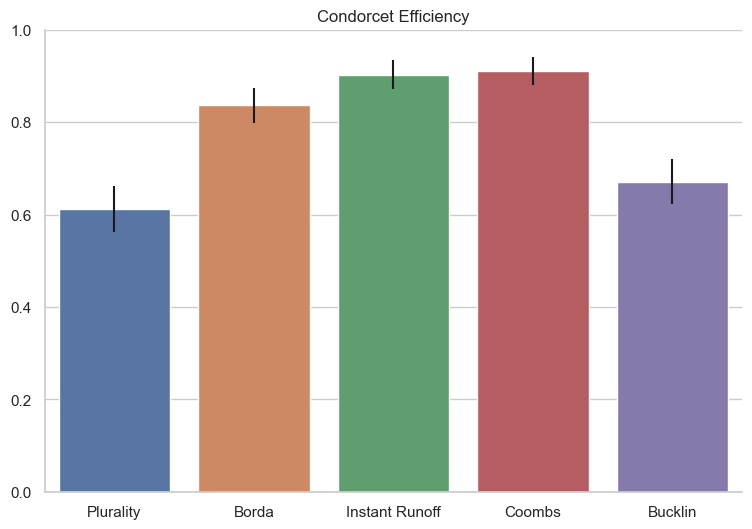

In [7]:

sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))
plt.title("Condorcet Efficiency")

# create a bar plot for each vm
for vm in voting_methods: 
    err_interval = binomial_confidence_interval(elect_condorcet_winner[vm.name])
    sns.barplot(x=[vm.name], y=[np.mean(elect_condorcet_winner[vm.name])], yerr=[err_interval[1] - err_interval[0]])
plt.ylim(0, 1)
sns.despine()

The Condorcet efficiency of a voting method depends on a number of factors, including the number of candidates, the number of voters, and the probability model used to generate the profiles.

In [8]:
SKIP = True # set to False to run the simulation.  It takes about 331 minutes to run. 

if not SKIP:
    voting_methods = [
        plurality, 
        borda, 
        instant_runoff, 
        coombs,
        bucklin,
    ]

    all_num_cands = [3, 4, 5, 6, 7, 8, 9, 10]
    all_num_voters = [10, 100, 1000]

    # for an overview of the available probability models for generating profiles, 
    # see https://pref-voting.readthedocs.io/en/latest/generate_profiles.html
    prob_model = {
        "Impartial Culture": lambda nc, nv: generate_profile(nc, nv, probmodel="IC"),
        "Mallows": lambda nc, nv: generate_profile(nc, nv, probmodel="mallows", phi=0.8, normalise_phi=True),
        "Plackett-Luce": lambda nc, nv: generate_profile(nc, nv, probmodel="plackett_luce", alphas=[random.choice([1, 2, 3, 4, 4]) for _ in range(nc)]),
        "Euclidean": lambda nc, nv: generate_profile(nc, nv, probmodel="euclidean", dimensions=2, space="gaussian_ball")
    }

    min_error = 0.02

    min_num_samples = 1000
    max_num_samples = 100_000

    data_for_df = {
        "num_candidates": [],
        "num_voters": [],
        "prob_model": [],
        "voting_method": [],
        "condorcet_efficiency": [],
        "error": [],
        "num_samples": [],
        "percent_condorcet_winner": [],
        "percent_condorcet_winner_error": [],
    }

    for pm, pm_fn in prob_model.items():
        for nc in all_num_cands:
            for nv in all_num_voters: 
                print("Running simulations for", pm, "with", nc, "candidates and", nv, "voters")

                num_samples = 0
                error_ranges = []
                elect_condorcet_winner = {
                    vm.name: [] for vm in voting_methods
                }
                while num_samples < min_num_samples or (any([(err[1] - err[0]) > min_error for err in error_ranges]) and num_samples < max_num_samples):

                    num_samples += 1

                    prof = generate_profile(nc, nv)

                    cw = prof.condorcet_winner()

                    has_condorcet_winner.append(cw is not None)
                    for vm in voting_methods: 
                        if cw is not None: 
                            elect_condorcet_winner[vm.name].append(vm(prof) == [cw])

                    error_ranges = [binomial_confidence_interval(elect_condorcet_winner[vm.name])  if len(elect_condorcet_winner[vm.name]) > 0 else (0, np.inf) for vm in voting_methods]

                for vm in voting_methods:
                    data_for_df["num_candidates"].append(nc)
                    data_for_df["num_voters"].append(nv)
                    data_for_df["prob_model"].append(pm)
                    data_for_df["voting_method"].append(vm.name)
                    data_for_df["condorcet_efficiency"].append(np.mean(elect_condorcet_winner[vm.name]))
                    err_interval = binomial_confidence_interval(elect_condorcet_winner[vm.name])
                    data_for_df["error"].append(err_interval[1] - err_interval[0])
                    data_for_df["num_samples"].append(num_samples)
                    data_for_df["percent_condorcet_winner"].append(np.mean(has_condorcet_winner))
                    err_interval = binomial_confidence_interval(has_condorcet_winner)
                    data_for_df["percent_condorcet_winner_error"].append(err_interval[1] - err_interval[0])
                df = pd.DataFrame(data_for_df)
                df.to_csv("condorcet_efficiency.csv")
else: 
    print("Skipping simulation")
    print("Reading data from condorcet_efficiency.csv")
    df = pd.read_csv("condorcet_efficiency.csv")

Skipping simulation
Reading data from condorcet_efficiency.csv


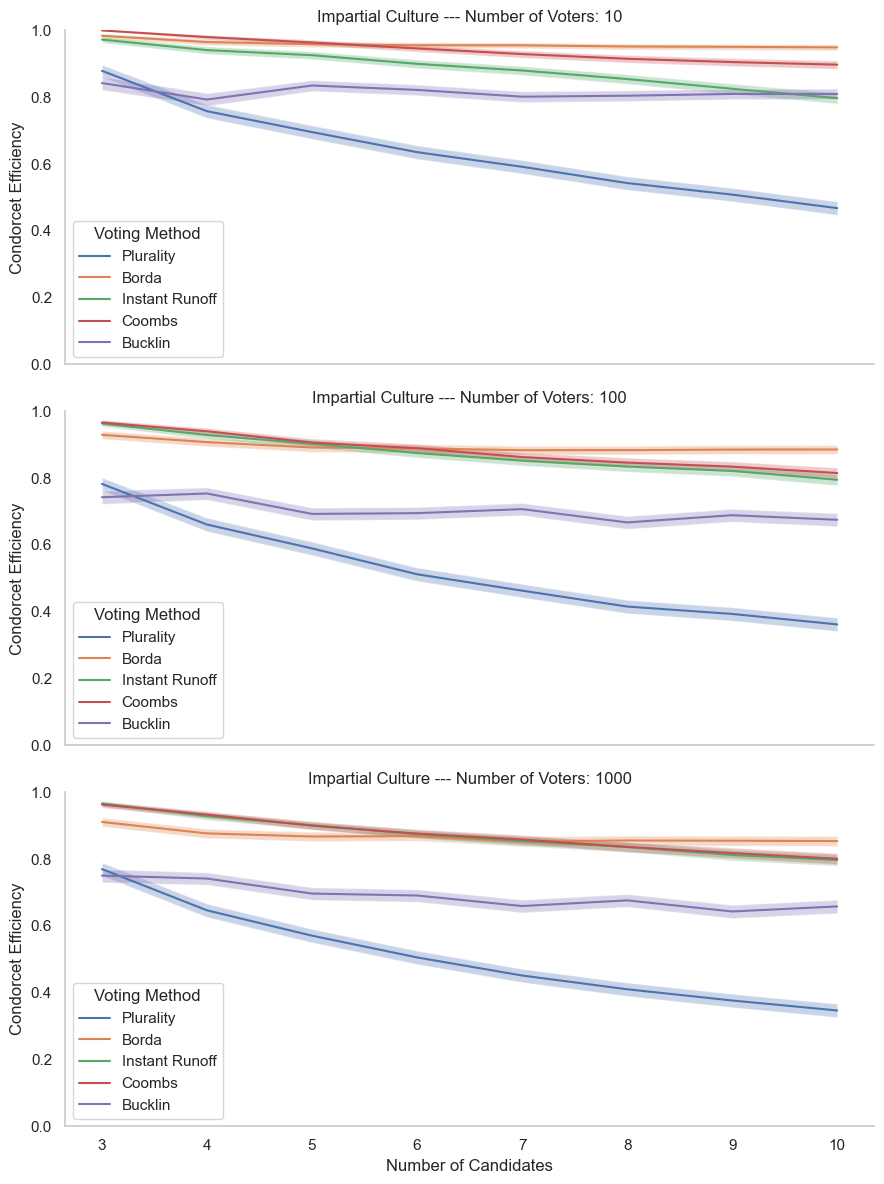

In [9]:

prob_model = 'Impartial Culture' #'Euclidean' #'Mallows'  #'Plackett-Luce'

file_path = './condorcet_efficiency.csv'
df = pd.read_csv(file_path)

filtered_df = df[df['prob_model'] == prob_model]

num_voters_unique = filtered_df['num_voters'].unique()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 12), sharex=True)

for i, num_voters in enumerate(num_voters_unique):
    voter_data = filtered_df[filtered_df['num_voters'] == num_voters]

    for method in voter_data['voting_method'].unique():
        method_data = voter_data[voter_data['voting_method'] == method]
        axes[i].plot(method_data['num_candidates'], method_data['condorcet_efficiency'], label=method)
        axes[i].fill_between(
            method_data['num_candidates'], 
            method_data['condorcet_efficiency'] - method_data['error'],
            method_data['condorcet_efficiency'] + method_data['error'], 
            alpha=0.3
        )

    axes[i].set_ylim(0, 1)
    axes[i].set_title(f'{prob_model} --- Number of Voters: {num_voters}')
    axes[i].set_ylabel('Condorcet Efficiency')
    axes[i].legend(title='Voting Method')
    axes[i].grid(False)

axes[-1].set_xlabel('Number of Candidates')

sns.despine()
plt.tight_layout()
plt.show()



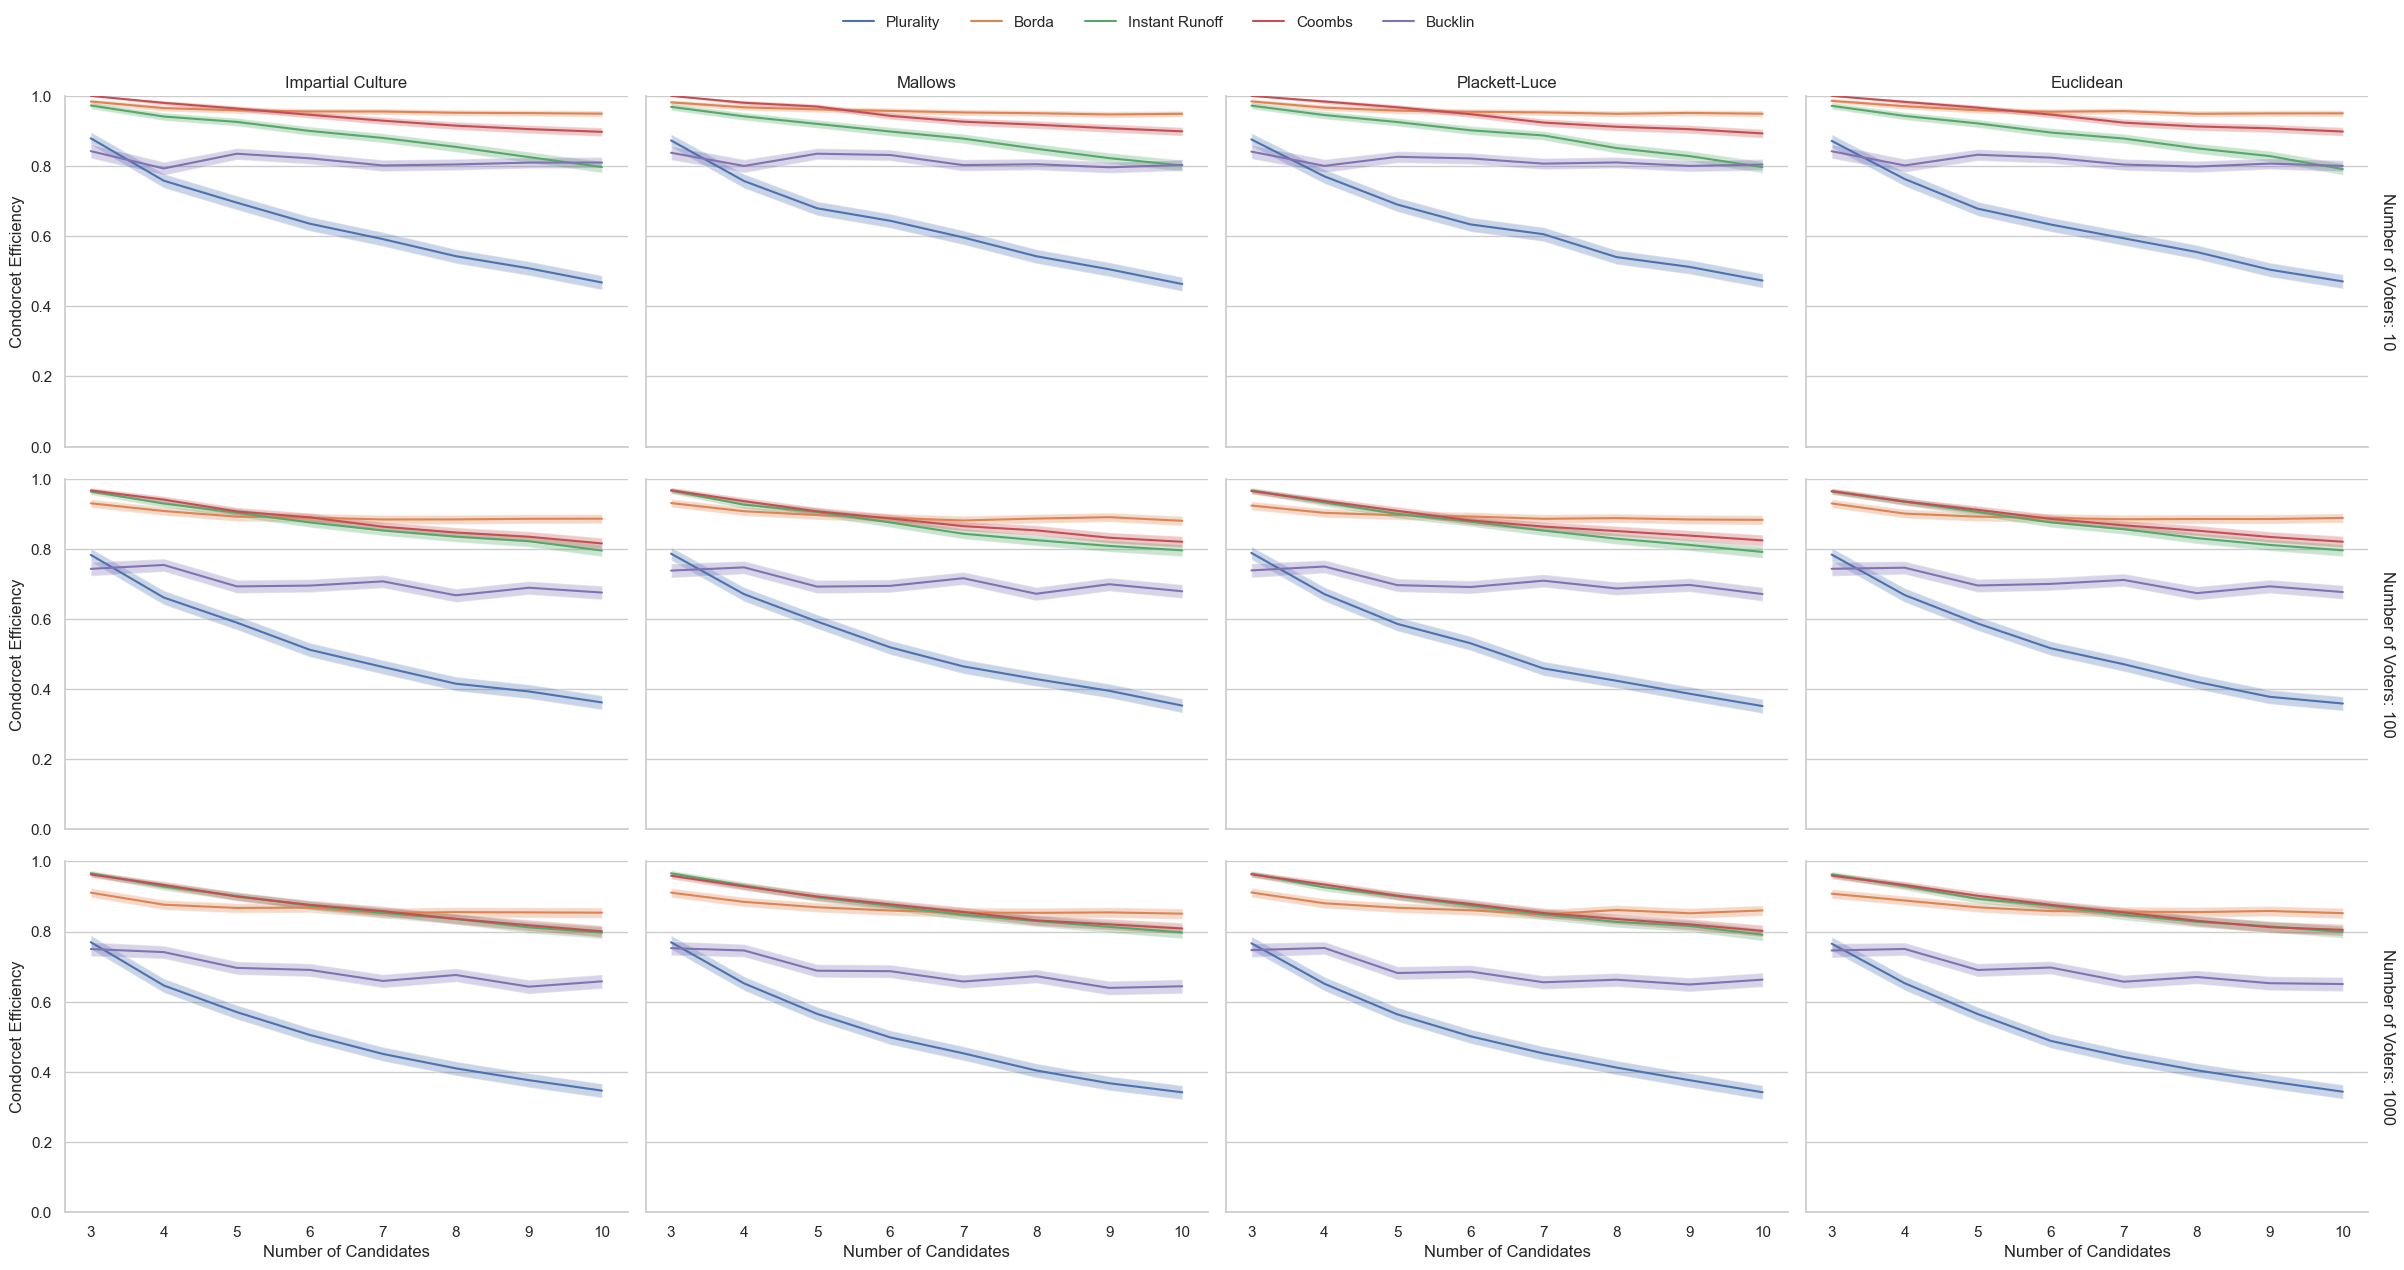

In [10]:

file_path = './condorcet_efficiency.csv'   
df_latest = pd.read_csv(file_path)

df_latest['num_candidates'] = df_latest['num_candidates'].astype(str)

g = sns.FacetGrid(df_latest, row='num_voters', col='prob_model', height=4, aspect=1.5, margin_titles=True)

def plot_with_error_bands(data, **kwargs):
    for method in data['voting_method'].unique():
        method_data = data[data['voting_method'] == method]
        plt.plot(method_data['num_candidates'], method_data['condorcet_efficiency'], label=method)
        plt.fill_between(
            method_data['num_candidates'], 
            method_data['condorcet_efficiency'] - method_data['error'],
            method_data['condorcet_efficiency'] + method_data['error'], 
            alpha=0.3
        )
        plt.ylim(0, 1)
        plt.grid(axis='x')

g.map_dataframe(plot_with_error_bands)

g.set_axis_labels('Number of Candidates', 'Condorcet Efficiency')

plt.legend(loc='upper center', bbox_to_anchor=(-1.15, 3.45), ncol=5, frameon=False)

g.set_titles(row_template='Number of Voters: {row_name}', col_template='{col_name}')

plt.show()


The voting methods in pref_voting can be filtered by whether they are Condorcet consistent. For example, to get a list of all Condorcet consistent voting methods and all voting methods that are not Condorcet consistent, you can use the following code:


In [11]:
from pref_voting.voting_methods_registry import voting_methods

print("Voting methods that are Condorcet consistent:")
for vm in voting_methods.filter(satisfies=['condorcet_winner']):
    print(vm.name)

print()
print("Voting methods that are not Condorcet consistent:")
for vm in voting_methods.filter(violates=['condorcet_winner']):
    print(vm.name)


Voting methods that are Condorcet consistent:
Baldwin
Baldwin PUT
Baldwin TB
Benham
Benham PUT
Benham TB
Bottom-Two-Runoff Instant Runoff
GOCHA
Raynaud
Split Cycle
Strict Nanson
Tideman Alternative GOCHA
Tideman Alternative GOCHA PUT
Tideman Alternative Top Cycle
Tideman Alternative Top Cycle PUT
Top Cycle
Weak Nanson
Woodall
Condorcet
Copeland
Simple Stable Voting
Beat Path
Essential Set
Loss-Trimmer Voting
Minimax
Ranked Pairs
Ranked Pairs TB
Ranked Pairs ZT
River
River TB
River ZT
Stable Voting
Weighted Covering
Blacks
Borda-Minimax Faceoff
Condorcet IRV
Condorcet IRV PUT
Condorcet Plurality
Copeland-Global-Borda
Copeland-Local-Borda
Daunou
Smith IRV
Smith IRV PUT
Smith-Minimax
Kemeny-Young
Preliminary Weighted Condorcet

Voting methods that are not Condorcet consistent:
Anti-Plurality
Borda
Dowdall
Plurality
Positive-Negative Voting
Coombs
Coombs PUT
Coombs TB
Instant Runoff
Instant Runoff PUT
Instant Runoff TB
Iterated Removal Condorcet Loser
PluralityWRunoff PUT
Bracket Voting
Bu

The ``condorcet_winner`` axiom can be used to find profiles in which a Condorcet winner exists but is not elected by a voting method. 

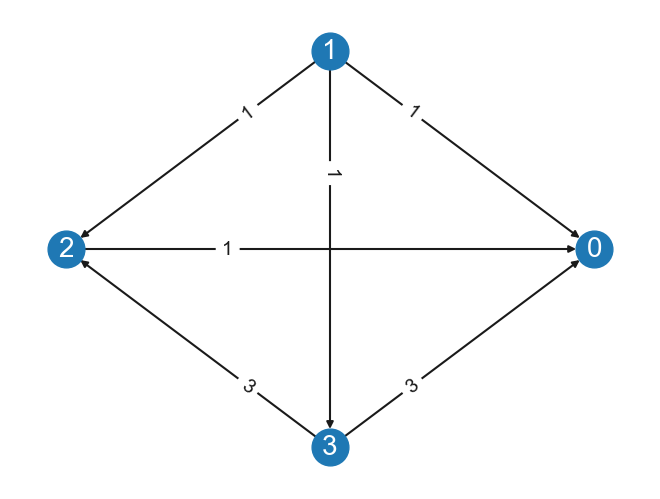

Profile([[3, 0, 2, 1], [1, 3, 2, 0], [1, 3, 2, 0]], rcounts=[1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})
The Condorcet winner 1 is not the unique winner: 
Borda winner is {3}


In [12]:
from pref_voting.dominance_axioms import *

vm = borda
num_cands = 4
num_voters = 3
num_trials = 1000

for t in range(num_trials): 
    prof = generate_profile(num_cands, num_voters)
    if condorcet_winner.has_violation(prof, vm, only_resolute=True, verbose=True): 
        break

The above code to calculate the Condorcet efficiency of a list of voting methods is available in the ``pref_voting.analysis`` module. 

In [13]:
from pref_voting.analysis import condorcet_efficiency_data

# this takes about 2 minutes to run, depending on how many cpus are used for parallel processing.

prob_models = {
    "Impartial Culture": lambda nc, nv: generate_profile(nc, nv),
    "Mallows": lambda nc, nv: generate_profile(nc, nv, probmodel="mallows", phi=0.8, normalise_phi=True),
    "Plackett-Luce": lambda nc, nv: generate_profile(nc, nv, probmodel="plackett_luce", alphas=[random.choice([1, 2, 3, 4, 4]) for _ in range(nc)]),
    "Urn": lambda nc, nv: generate_profile(nc, nv, probmodel="urn", alpha=5),
    "Spatial": lambda nc, nv: generate_spatial_profile(nc, nv, 2).to_utility_profile().to_ranking_profile().to_linear_profile()
}

df = condorcet_efficiency_data(
    [plurality, borda, instant_runoff], 
    numbers_of_candidates=[3, 4, 5], 
    numbers_of_voters=[15, 25, 50], 
    prob_models=prob_models, 
    min_num_samples=1000,
    max_num_samples=100_000,
    min_error=0.01,
    use_parallel=True, 
    num_cpus=12)

Impartial Culture: 3 candidates, 15 voters
Impartial Culture: 3 candidates, 25 voters
Impartial Culture: 3 candidates, 50 voters
Impartial Culture: 4 candidates, 15 voters
Impartial Culture: 4 candidates, 25 voters
Impartial Culture: 4 candidates, 50 voters
Impartial Culture: 5 candidates, 15 voters
Impartial Culture: 5 candidates, 25 voters
Impartial Culture: 5 candidates, 50 voters
Mallows: 3 candidates, 15 voters
Mallows: 3 candidates, 25 voters
Mallows: 3 candidates, 50 voters
Mallows: 4 candidates, 15 voters
Mallows: 4 candidates, 25 voters
Mallows: 4 candidates, 50 voters
Mallows: 5 candidates, 15 voters
Mallows: 5 candidates, 25 voters
Mallows: 5 candidates, 50 voters
Plackett-Luce: 3 candidates, 15 voters
Plackett-Luce: 3 candidates, 25 voters
Plackett-Luce: 3 candidates, 50 voters
Plackett-Luce: 4 candidates, 15 voters
Plackett-Luce: 4 candidates, 25 voters
Plackett-Luce: 4 candidates, 50 voters
Plackett-Luce: 5 candidates, 15 voters
Plackett-Luce: 5 candidates, 25 voters
Plac

In [14]:
df

,num_candidates,num_voters,prob_model,voting_method,condorcet_efficiency,error,num_samples,percent_condorcet_winner,percent_condorcet_winner_error,min_num_samples,max_num_samples,min_error
0,3,15,Impartial Culture,Plurality,0.736323,0.009957,33000,0.917788,0.005958,1000,100000,0.01
1,3,15,Impartial Culture,Borda,0.869548,0.007619,33000,0.917788,0.005958,1000,100000,0.01
2,3,15,Impartial Culture,Instant Runoff,0.929640,0.005794,33000,0.917788,0.005958,1000,100000,0.01
3,3,25,Impartial Culture,Plurality,0.734046,0.009857,34000,0.913912,0.005992,1000,100000,0.01
4,3,25,Impartial Culture,Borda,0.875261,0.007380,34000,0.913912,0.005992,1000,100000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
130,5,25,Spatial,Borda,0.852314,0.007245,38000,0.977000,0.003041,1000,100000,0.01
131,5,25,Spatial,Instant Runoff,0.813554,0.007950,38000,0.977000,0.003041,1000,100000,0.01
132,5,50,Spatial,Plurality,0.624154,0.009942,40000,0.916600,0.005444,1000,100000,0.01
133,5,50,Spatial,Borda,0.892565,0.006367,40000,0.916600,0.005444,1000,100000,0.01
